# Fashion MNIST - CNN
- 32 Conv2D layer
- 64 Conv2D layer
- MaxPooling2D layer
- Dropout(0.25)
- Flatten
- Fully Connected Network(512) layer
- Dropout(0.5)
- Output(10)

In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


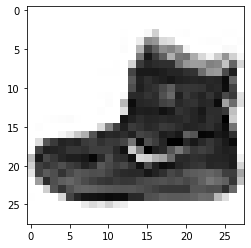

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys');

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Ankle boot'

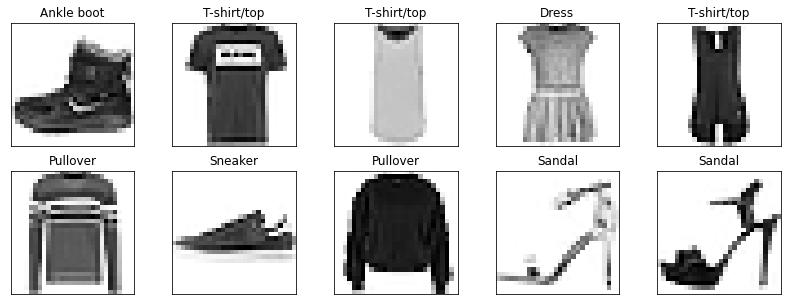

In [5]:
plt.figure(figsize=(14,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]); plt.yticks([])
plt.show()

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# X data 정규화 빛 차원 변경
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.

In [8]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

- 모델 정의,설정,학습,평가

In [9]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
model = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4719104   
                                                      

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model_path = 'best-fashion-mnist-cnn.h5'
checkpoint = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=10)

In [17]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, batch_size=200, epochs=100,
    callbacks=[checkpoint, early_stop], verbose=0
)


Epoch 00001: val_loss improved from inf to 0.32029, saving model to best-fashion-mnist-cnn.h5

Epoch 00002: val_loss improved from 0.32029 to 0.27499, saving model to best-fashion-mnist-cnn.h5

Epoch 00003: val_loss improved from 0.27499 to 0.24616, saving model to best-fashion-mnist-cnn.h5

Epoch 00004: val_loss improved from 0.24616 to 0.22610, saving model to best-fashion-mnist-cnn.h5

Epoch 00005: val_loss improved from 0.22610 to 0.22386, saving model to best-fashion-mnist-cnn.h5

Epoch 00006: val_loss improved from 0.22386 to 0.20865, saving model to best-fashion-mnist-cnn.h5

Epoch 00007: val_loss improved from 0.20865 to 0.20648, saving model to best-fashion-mnist-cnn.h5

Epoch 00008: val_loss improved from 0.20648 to 0.20168, saving model to best-fashion-mnist-cnn.h5

Epoch 00009: val_loss did not improve from 0.20168

Epoch 00010: val_loss did not improve from 0.20168

Epoch 00011: val_loss did not improve from 0.20168

Epoch 00012: val_loss did not improve from 0.20168

Epo

In [18]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2161 - accuracy: 0.9245


[0.21613653004169464, 0.9244999885559082]

- 학습과정 시각화

In [19]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

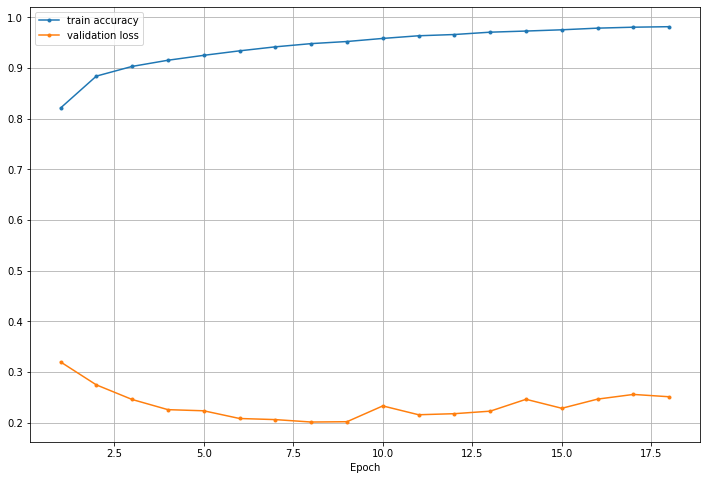

In [20]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, 'o-', ms=3, label='train accuracy')
plt.plot(xs, y_vloss, 'o-', ms=3, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('Epoch')
plt.show()